# Machine Learning - Unsupervised Learning and Feature Engineering
## Unit 4. Feature Engineering
### Lecturer: Tai Le Quy
#### 24.8.2023
Thanks Prof. Dr. Christian Müller-Kett for his code.

## 1 Numerical Features

### 1.1 Imputation of missing values

In [1]:
# IU - International University of Applied Science
# Machine Learning - Unsupervised Machine Learning
# Course Code: DLBDSMLUSL01

# Numerical feature imputation

#%% load libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge

Example 1: Impute missing values by using mean (placeholder value)

In [2]:
#Create the dataset of energy consumption as a DataFrame with the missing value
#%% generate sample data
Table = {\
    'Customer-ID': [1, 2, 3, 4, 5], \
    'Gender': ['M','F','M','F','F'], \
    'Work-type': [1, 2, 2, 3, 3], \
    'Client-satisfaction':[3, 0, 4, 3, 5], \
    'Number-occupants': [2, 4, 2, 1, 2],
    'Consumption':[70, 140, 65, np.NaN, 65]}
TDF = pd.DataFrame(data=Table)

In [3]:
TDF

,Customer-ID,Gender,Work-type,Client-satisfaction,Number-occupants,Consumption
0,1,M,1,3,2,70.0
1,2,F,2,0,4,140.0
2,3,M,2,4,2,65.0
3,4,F,3,3,1,NaN
4,5,F,3,5,2,65.0


In [4]:
#%% simple imputation of missing values
imput = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imput = imput.fit(TDF[['Consumption']])
imput = imput.transform(TDF[['Consumption']])
TDF['Consumption']= imput

In [5]:
TDF

,Customer-ID,Gender,Work-type,Client-satisfaction,Number-occupants,Consumption
0,1,M,1,3,2,70.0
1,2,F,2,0,4,140.0
2,3,M,2,4,2,65.0
3,4,F,3,3,1,85.0
4,5,F,3,5,2,65.0


Example 2: Using regression imputation technique.

In [7]:
#%% generate sample data
table = {'Var-1': [10, np.NaN, 2, 1, 5],\
         'Var-2': [2, 1, 0.4, 0.2, np.NaN]}
TDF = pd.DataFrame(data=table)
TDF

,Var-1,Var-2
0,10.0,2.0
1,NaN,1.0
2,2.0,0.4
3,1.0,0.2
4,5.0,NaN


In [8]:
#%% apply regression imputation using ‘Bayesian Ridge’
imputbr = IterativeImputer(BayesianRidge())
TDF = pd.DataFrame(imputbr.fit_transform(TDF))
TDF

,0,1
0,10.000000,2.000000
1,5.000531,1.000000
2,2.000000,0.400000
3,1.000000,0.200000
4,5.000000,0.999973


In [9]:
#%%
# apply regression imputation using
# ‘Extra Trees Regressor’
TDF = pd.DataFrame(data=table)
imputetr = IterativeImputer(ExtraTreesRegressor())
TDF = pd.DataFrame(imputetr.fit_transform(TDF))
TDF

,0,1
0,10.0,2.0
1,5.0,1.0
2,2.0,0.4
3,1.0,0.2
4,5.0,1.0


### 1.2 Feature Scaling

In [10]:
#%% import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [11]:
#%% generate sample data
Table = {\
    'Customer-ID': [1, 2, 3, 4, 5], \
    'Gender': ['M', 'F', 'M',' F', 'F'], \
    'Work-type': [1, 2, 2, 3, 3], \
    'Client-satisfaction': [3, 0, 4, 3, 5], \
    'Number-occupants': [2, 4, 2, 1, 2], \
    'Consumption': [70, 140, 65, 40, 65]}
TDF = pd.DataFrame(data=Table)

In [12]:
TDF

,Customer-ID,Gender,Work-type,Client-satisfaction,Number-occupants,Consumption
0,1,M,1,3,2,70
1,2,F,2,0,4,140
2,3,M,2,4,2,65
3,4,F,3,3,1,40
4,5,F,3,5,2,65


In [16]:
#%% apply Min-Max Scaling on the feature 'Consumption'
MMS = MinMaxScaler().fit_transform(TDF[['Consumption']])
TDF['Consumption'] = MMS

print(TDF['Consumption'])

0    0.30
1    1.00
2    0.25
3    0.00
4    0.25
Name: Consumption, dtype: float64


In [17]:
print(TDF['Consumption'].describe())

count    5.000000
mean     0.360000
std      0.376497
min      0.000000
25%      0.250000
50%      0.250000
75%      0.300000
max      1.000000
Name: Consumption, dtype: float64


In [18]:
#%% apply standardization on the feature 'Consumption'
TDF = pd.DataFrame(data=Table)
ST = StandardScaler().fit_transform(TDF[['Consumption']])
TDF['Consumption'] = ST

print(TDF['Consumption'])

0   -0.178174
1    1.900524
2   -0.326653
3   -1.069045
4   -0.326653
Name: Consumption, dtype: float64


In [19]:
print(TDF['Consumption'].describe())

count    5.000000e+00
mean    -3.330669e-17
std      1.118034e+00
min     -1.069045e+00
25%     -3.266526e-01
50%     -3.266526e-01
75%     -1.781742e-01
max      1.900524e+00
Name: Consumption, dtype: float64


In [13]:
TDF = pd.DataFrame(data=Table)
TDF

,Customer-ID,Gender,Work-type,Client-satisfaction,Number-occupants,Consumption
0,1,M,1,3,2,70
1,2,F,2,0,4,140
2,3,M,2,4,2,65
3,4,F,3,3,1,40
4,5,F,3,5,2,65


In [14]:
#%% apply Robust Scaling to the column 'Consumption'
#Thanks to the use of the median and IQR of data points, rather than minimum and
#ean, robust scaling has the advantage of being more adapted to scale-sparse data
#oints than min-max scaling and standardization
RS = RobustScaler().fit_transform(TDF[['Consumption']])
TDF['Consumption'] = RS

In [15]:
print(TDF['Consumption'])

0     1.0
1    15.0
2     0.0
3    -5.0
4     0.0
Name: Consumption, dtype: float64


### 1.3 Feature Generation

#### 1.3.1 Transformed features

In [44]:
#Install library
!pip install feature-engine

In [45]:
# Numerical feature transformation

#%% import libraries
from numpy import exp
from numpy.random import randn
from feature_engine import transformation as vt
import pandas as pd
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

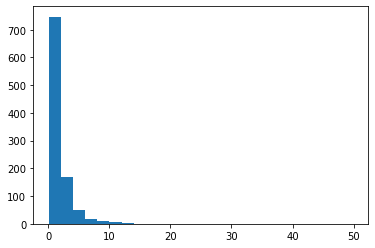

In [46]:
#%% generate sample data from a normal distribution 
dat = randn(999)

#%% add a skew to the generated data points
dat_skew = exp(dat)
plt.hist(dat_skew, bins = 25)
plt.show()

In [47]:
#%% convert the data into a dataframe
dat_skew = dat_skew.reshape((len(dat), 1))
dat_skew = pd.DataFrame(dat_skew, columns = ['Value'])

In [48]:
dat_skew

,Value
0,1.199305
1,0.811243
2,1.871166
3,3.254511
4,0.152871
...,...
994,0.305152
995,0.466822
996,0.307069
997,1.669211


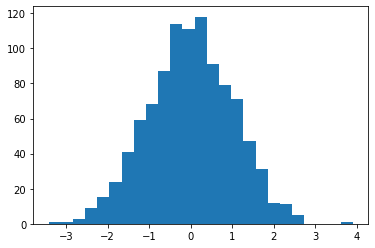

In [49]:
#%% generate and fit log transformer
lgt = vt.LogTransformer(variables= ['Value'])
lgt.fit(dat_skew)

#%% apply log transformation 
dat_lg = lgt.transform(dat_skew)

#%% plot the distribution of the transformed data
plt.hist(dat_lg['Value'], bins=25)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (999). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


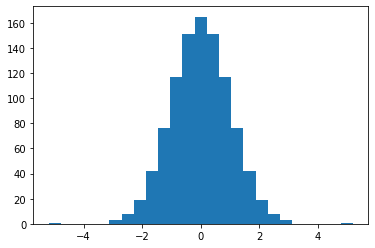

In [50]:
#%% generate and fit quantile transformer
qt = QuantileTransformer(output_distribution='normal')
qt.fit(dat_skew[['Value']])

#%% apply quantile transformation 
dat_q = qt.transform(dat_skew[['Value']])

#%% plot the distribution of the transformed data
plt.hist(dat_q, bins=25)
plt.show()

#### 1.3.2 Interaction features

Interaction features, or cross product features, allow the combination of pairs of features through the logical operator AND

Interaction features can be generated using the polynomial expansion function PolynomialFeatures
in the Python library sklearn. Let us generate the interaction feature between the features “number occupants” and “consumption” of the energy consumption
example.

In [16]:
# Numerical interaction features

#%% import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [17]:
#%% generate sample data
Table = {\
    'Customer-ID': [1, 2, 3, 4, 5], \
    'Gender': ['M','F','M','F','F'], \
    'Work-type': [1, 2, 2, 3, 3], \
    'Client-satisfaction':[3, 0, 4, 3, 5], \
    'Number-occupants': [2, 4, 2, 1, 2],
    'Consumption':[70, 140, 65, 40, 65]}
TDF = pd.DataFrame(data=Table)

In [18]:
TDF

,Customer-ID,Gender,Work-type,Client-satisfaction,Number-occupants,Consumption
0,1,M,1,3,2,70
1,2,F,2,0,4,140
2,3,M,2,4,2,65
3,4,F,3,3,1,40
4,5,F,3,5,2,65


In [25]:
#%% create and fit a polynomial feature creator
#degree: int or tuple (min_degree, max_degree), default=2
#If a single int is given, it specifies the maximal degree of the polynomial features. 
#If a tuple (min_degree, max_degree) is passed, then min_degree is the minimum and max_degree is the maximum 
#polynomial degree of the generated features. Note that min_degree=0 and min_degree=1 are equivalent as 
#outputting the degree zero term is determined by include_bias.

#interaction_only: bool, default=False
#If True, only interaction features are produced: features that are products of at most degree distinct input features, 
#i.e. terms with power of 2 or higher of the same input feature are excluded:

#included: x[0], x[1], x[0] * x[1], etc.

#excluded: x[0] ** 2, x[0] ** 2 * x[1], etc.

#include_bias: bool, default=True
#If True (default), then include a bias column, the feature in which all polynomial powers are zero 
#(i.e. a column of ones - acts as an intercept term in a linear model).

pf =  PolynomialFeatures(degree = 2, interaction_only=True, include_bias = False).fit(TDF[['Number-occupants', 'Consumption']])


In [26]:
#%% apply the polynomial feature creator to the data
int_feat = pf.transform(TDF[['Number-occupants',  'Consumption']])

In [27]:
print(int_feat)

[[  2.  70. 140.]
 [  4. 140. 560.]
 [  2.  65. 130.]
 [  1.  40.  40.]
 [  2.  65. 130.]]


In [28]:
#%%
# convert the generated interaction feature array
# to a dataframe
int_feat = pd.DataFrame(int_feat, columns=['Number-occupants', 'Consumption', 'nOcc_x_Conspt'])

#%% append generated interaction feature to dataframe
TDF = pd.concat([TDF, int_feat], axis=1)

In [29]:
TDF

,Customer-ID,Gender,Work-type,Client-satisfaction,Number-occupants,Consumption,Number-occupants,Consumption,nOcc_x_Conspt
0,1,M,1,3,2,70,2.0,70.0,140.0
1,2,F,2,0,4,140,4.0,140.0,560.0
2,3,M,2,4,2,65,2.0,65.0,130.0
3,4,F,3,3,1,40,1.0,40.0,40.0
4,5,F,3,5,2,65,2.0,65.0,130.0


## 2 Categorical Features

### 2.1 Feature Cleaning (Imputing Missing Values)

In [30]:
# Categorical feature imputation

#%% import libraries
import pandas as pd

In [31]:
#%% generate sample data
Table = { \
    'Customer-ID': [1, 2, 3, 4, 5], \
    'Gender':['M', pd.NA, 'M', 'F', 'F'], \
    'Work-type': [1, 2, 2, 3, 3], \
    'Client-satisfaction':[3, 0, 4, 3, 5], \
    'Number-occupants': [2, 4, 2, 1, 2], \
    'Consumption': [70, 140, 65, 40, 65]}
TDF = pd.DataFrame(data=Table)

In [32]:
TDF

,Customer-ID,Gender,Work-type,Client-satisfaction,Number-occupants,Consumption
0,1,M,1,3,2,70
1,2,<NA>,2,0,4,140
2,3,M,2,4,2,65
3,4,F,3,3,1,40
4,5,F,3,5,2,65


In [34]:
#%% print the number of missing values per column
print(TDF.isnull().sum())

Customer-ID            0
Gender                 1
Work-type              0
Client-satisfaction    0
Number-occupants       0
Consumption            0
dtype: int64


In [35]:
#%% simple imputation by mode
TDF = TDF.fillna(TDF['Gender'].value_counts().index[0])
print(TDF.isnull().sum())

Customer-ID            0
Gender                 0
Work-type              0
Client-satisfaction    0
Number-occupants       0
Consumption            0
dtype: int64


In [36]:
TDF

,Customer-ID,Gender,Work-type,Client-satisfaction,Number-occupants,Consumption
0,1,M,1,3,2,70
1,2,F,2,0,4,140
2,3,M,2,4,2,65
3,4,F,3,3,1,40
4,5,F,3,5,2,65


### 2.2 Feature Encoding

One technique used to convert categorical features into numerical features is label encoding. This alphabetically converts each category in a column to a number between 0 and (the number of categories —1). For this example, the “gender” category will take one of two variables M and F, which will be replaced by 1 and 0, respectively.

In [37]:
# Categorical features encoding

#%% import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [47]:
#%% generate sample data
Table = { \
    'Customer-ID': [1, 2, 3, 4, 5], \
    'Gender':['M', 'F', 'M', 'F', 'F'], \
    'Work-type': [1, 2, 2, 3, 3], \
    'Client-satisfaction':[3, 0, 4, 3, 5], \
    'Number-occupants': [2, 4, 2, 1, 2], \
    'Consumption': [70, 140, 65, 40, 65]}
TDF = pd.DataFrame(data=Table)

In [48]:
TDF

,Customer-ID,Gender,Work-type,Client-satisfaction,Number-occupants,Consumption
0,1,M,1,3,2,70
1,2,F,2,0,4,140
2,3,M,2,4,2,65
3,4,F,3,3,1,40
4,5,F,3,5,2,65


In [49]:
#%% 
# encode the categories in the column
# 'Gender' by numbers
TDF['Gender'] = LabelEncoder().fit_transform(TDF['Gender'])

# show the resulting column
TDF['Gender']

0    1
1    0
2    1
3    0
4    0
Name: Gender, dtype: int32

In [50]:
TDF

,Customer-ID,Gender,Work-type,Client-satisfaction,Number-occupants,Consumption
0,1,1,1,3,2,70
1,2,0,2,0,4,140
2,3,1,2,4,2,65
3,4,0,3,3,1,40
4,5,0,3,5,2,65


In [45]:
#%% one-hot-encoding
TDF = pd.DataFrame(data=Table)

print(TDF.dtypes)

Customer-ID             int64
Gender                 object
Work-type               int64
Client-satisfaction     int64
Number-occupants        int64
Consumption             int64
dtype: object


In [46]:
TDF

,Customer-ID,Gender,Work-type,Client-satisfaction,Number-occupants,Consumption
0,1,M,1,3,2,70
1,2,F,2,0,4,140
2,3,M,2,4,2,65
3,4,F,3,3,1,40
4,5,F,3,5,2,65


In [51]:
#%% specify categorical columns as text
TDF['Work-type'] = TDF['Work-type'].astype(str)
TDF['Client-satisfaction'] = TDF['Client-satisfaction'].astype(str)
print(TDF.dtypes)

Customer-ID             int64
Gender                  int32
Work-type              object
Client-satisfaction    object
Number-occupants        int64
Consumption             int64
dtype: object


In [52]:
#%% one-hot-encode categorical features
TDF_1hot = pd.get_dummies(TDF)

In [53]:
TDF_1hot

,Customer-ID,Gender,Number-occupants,Consumption,Work-type_1,Work-type_2,Work-type_3,Client-satisfaction_0,Client-satisfaction_3,Client-satisfaction_4,Client-satisfaction_5
0,1,1,2,70,1,0,0,0,1,0,0
1,2,0,4,140,0,1,0,1,0,0,0
2,3,1,2,65,0,1,0,0,0,1,0
3,4,0,1,40,0,0,1,0,1,0,0
4,5,0,2,65,0,0,1,0,0,0,1


In [54]:
print(list(TDF_1hot.columns))

['Customer-ID', 'Gender', 'Number-occupants', 'Consumption', 'Work-type_1', 'Work-type_2', 'Work-type_3', 'Client-satisfaction_0', 'Client-satisfaction_3', 'Client-satisfaction_4', 'Client-satisfaction_5']


### 2.3 Feature Generation

#### 2.3.1 Feature splitting or spreading
Splitting, or spreading, features in order to extract useful features from raw and irrelevant features

In [55]:
# Categorical features generation

#%% import libraries
import pandas as pd
import numpy as np

In [56]:
#%% generate sample data
Table = { \
    'Customer-ID': [1, 2, 3, 4, 5], \
    'Names': [ \
        'Joe B. BARBY 12-05-2019', \
        'Juliette KARB 18-08-2018', \
        'Lucien VAN 05-07-2017', \
        'Danielle G. REB 03-09-2020', \
        'Lydia HAM 09-07-2018'], \
    'Gender': ['M', 'F', 'M', 'F', 'F'], \
    'Work-type': [1, 2, 2, 3, 3], \
    'Client-satisfaction': [3, 0, 4, 3, 5], \
    'Number-occupants': [2, 4, 2, 1, 2], \
    'Consumption': [70, 140, 65, 40, 65]}
TDF = pd.DataFrame(data=Table)

In [77]:
TDF

,Customer-ID,Names,Gender,Work-type,Client-satisfaction,Number-occupants,Consumption
0,1,Joe B. BARBY 12-05-2019,M,1,3,2,70
1,2,Juliette KARB 18-08-2018,F,2,0,4,140
2,3,Lucien VAN 05-07-2017,M,2,4,2,65
3,4,Danielle G. REB 03-09-2020,F,3,3,1,40
4,5,Lydia HAM 09-07-2018,F,3,5,2,65


In [78]:
## spliting columns

# %% split information in one column into three
TDF['First-Name'] = TDF.Names.str.split(" ").\
    map(lambda x: x[0])
TDF['Second-Name'] = TDF.Names.str.split(" ").\
    map(lambda x: x[-2])
TDF['Birth-Year'] = TDF.Names.\
    str.split("-", n=2, expand=True)[2]

In [79]:
TDF

,Customer-ID,Names,Gender,Work-type,Client-satisfaction,Number-occupants,Consumption,First-Name,Second-Name,Birth-Year
0,1,Joe B. BARBY 12-05-2019,M,1,3,2,70,Joe,BARBY,2019
1,2,Juliette KARB 18-08-2018,F,2,0,4,140,Juliette,KARB,2018
2,3,Lucien VAN 05-07-2017,M,2,4,2,65,Lucien,VAN,2017
3,4,Danielle G. REB 03-09-2020,F,3,3,1,40,Danielle,REB,2020
4,5,Lydia HAM 09-07-2018,F,3,5,2,65,Lydia,HAM,2018


#### 2.3.2 Feature grouping
Multiple rows may represent the same data point. Therefore, it is important to convert an untidy dataset to a tidy dataset. This can be achieved using group-by operations through deciding the aggregation function (sum, mean, max, and min, etc.).

In [80]:
#%% generate sample data
dat_tidy = pd.DataFrame({'Customer-ID': [1, 2, 3], \
    'Gender': ['M', 'F', 'M']})
dat_non_tidy = pd.DataFrame(\
    {'Customer-ID': [1, 2, 3, 2, 3, 1],
     'Consumption': [70, 50, 65, 57, 69, 73]})

In [81]:
dat_tidy

,Customer-ID,Gender
0,1,M
1,2,F
2,3,M


In [82]:
dat_non_tidy

,Customer-ID,Consumption
0,1,70
1,2,50
2,3,65
3,2,57
4,3,69
5,1,73


In [83]:
## aggregation and joining

#%% aggregate consumption per customer
dat = dat_non_tidy.groupby('Customer-ID')['Consumption'].\
    agg(['sum'])

# rename column
dat.columns = ['Sum-Consumption']

# join tables
dat = dat_tidy.merge(dat, left_on='Customer-ID', \
    right_index=True, how='left')

In [84]:
# show the resulting table
dat

,Customer-ID,Gender,Sum-Consumption
0,1,M,143
1,2,F,107
2,3,M,134


#### 2.3.3 Extracting dates
Date columns carry interesting information that machine learning approaches ignore because they combine year, month, and day in the same cell. Therefore, it is useful to extract dates to improve the performance of machine learning methods using one of
the following:
- extracting the year, month, or day of the date
- extracting the elapsed time between the current date and the date in the column
- extracting whether the day is a weekday, a weekend, or a holiday

In [57]:
# Extracting dates

#%% import libraries
import pandas as pd
from datetime import date

In [58]:
#%% generate sample data
Table = {'Customer-ID': [1, 2, 3, 4, 5], \
    'Date': ['12-05-2019', '18-08-2018', \
        '05-07-2017', '03-09-2020', '09-07-2018'], \
    'Consumption': [70, 140, 65, 40, 65]}
TDF = pd.DataFrame(data=Table)

In [59]:
TDF

,Customer-ID,Date,Consumption
0,1,12-05-2019,70
1,2,18-08-2018,140
2,3,05-07-2017,65
3,4,03-09-2020,40
4,5,09-07-2018,65


In [60]:
#%% convert 'Date'-column to date format
TDF['Date'] = pd.to_datetime(TDF.Date, format="%d-%m-%Y")

# extract the year
TDF['year'] = TDF['Date'].dt.year

# extract the month
TDF['month'] = TDF['Date'].dt.month

# extract quarter of the year
TDF['quarter'] = TDF['Date'].dt.quarter

In [90]:
TDF

,Customer-ID,Date,Consumption,year,month,quarter
0,1,2019-05-12,70,2019,5,2
1,2,2018-08-18,140,2018,8,3
2,3,2017-07-05,65,2017,7,3
3,4,2020-09-03,40,2020,9,3
4,5,2018-07-09,65,2018,7,3


In [61]:
#%% extract passed years 
years_diff = date.today().year - TDF['Date'].dt.year
TDF['passed_years'] = years_diff

In [62]:
TDF

,Customer-ID,Date,Consumption,year,month,quarter,passed_years
0,1,2019-05-12,70,2019,5,2,4
1,2,2018-08-18,140,2018,8,3,5
2,3,2017-07-05,65,2017,7,3,6
3,4,2020-09-03,40,2020,9,3,3
4,5,2018-07-09,65,2018,7,3,5


In [63]:
#%% extract passed months 
months_diff = (date.today().year - TDF['Date'].dt.year) * 12 + date.today().month - TDF['Date'].dt.month
TDF['passed_months'] = months_diff

In [64]:
#%% extract the name of weekday
TDF['day_name'] = TDF['Date'].dt.day_name()

In [65]:
TDF

,Customer-ID,Date,Consumption,year,month,quarter,passed_years,passed_months,day_name
0,1,2019-05-12,70,2019,5,2,4,51,Sunday
1,2,2018-08-18,140,2018,8,3,5,60,Saturday
2,3,2017-07-05,65,2017,7,3,6,73,Wednesday
3,4,2020-09-03,40,2020,9,3,3,35,Thursday
4,5,2018-07-09,65,2018,7,3,5,61,Monday


In [94]:
#%% extract the day of the week
TDF['dow'] = pd.to_datetime(TDF['Date']).dt.dayofweek

In [95]:
#%% extract weekends
TDF['weekend'] = TDF['dow'].map(lambda x: 0 if x < 5 else 1)

In [96]:
TDF

,Customer-ID,Date,Consumption,year,month,quarter,passed_years,passed_months,day_name,dow,weekend
0,1,2019-05-12,70,2019,5,2,4,51,Sunday,6,1
1,2,2018-08-18,140,2018,8,3,5,60,Saturday,5,1
2,3,2017-07-05,65,2017,7,3,6,73,Wednesday,2,0
3,4,2020-09-03,40,2020,9,3,3,35,Thursday,3,0
4,5,2018-07-09,65,2018,7,3,5,61,Monday,0,0


#### 2.3.4 Cross products features (interaction features)

In [66]:
# Categorical cross-product features

#%% import libraries
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

In [67]:
#%% generate sample data
Table = {'Gender': ['M','F','M','F','F','M', 'F', 'M'], \
         'Science-Grant': ['Y', 'N', 'Y', 'N', \
             'Y', 'N', 'N', 'N']}
TDF = pd.DataFrame(data=Table)

In [68]:
TDF

,Gender,Science-Grant
0,M,Y
1,F,N
2,M,Y
3,F,N
4,F,Y
5,M,N
6,F,N
7,M,N


In [69]:
#%% one-hot encoding
TDF = pd.get_dummies(TDF)

In [101]:
TDF

,Gender_F,Gender_M,Science-Grant_N,Science-Grant_Y
0,0,1,0,1
1,1,0,1,0
2,0,1,0,1
3,1,0,1,0
4,1,0,0,1
5,0,1,1,0
6,1,0,1,0
7,0,1,1,0


In [102]:
#%% generate interaction features (female x grant)
#Since we are interested only in the interaction between features, i.e., “Gender_F” x “Science-Grant_N,” 
#the parameter “interaction only” is selected to be “True.” This allows us to avoid generating 
#the features “Gender_F” x “Gender_F” and “Science-Grant_N” x “Science-Grant_N.” 
#The parameter “include bias” is deactivated by assigning the “False” value in order to avoid generating 
#an intercept feature (the feature in which all polynomial powers are zero, i.e., a column of ones). 
#Calculate the mean value of female scientists who did not obtain the grant
pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False).fit(TDF[['Gender_F','Science-Grant_N']])
int_feat = pf.transform(TDF[['Gender_F', 'Science-Grant_N']])

In [103]:
print(int_feat)

[[0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 1. 1.]
 [0. 1. 0.]]


In [105]:
#%%
# convert the generated interaction feature array
# to a dataframe
fem_x_grant = pd.DataFrame(int_feat, columns=['Gender_F','Science-Grant_N', 'FxGrant'])

In [106]:
#%%
# Calculate the mean value of female scientists who did not obtain the grant
print(fem_x_grant['FxGrant'].mean(0))

0.375


In [107]:
#%% generate interaction features (male x grant)
pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False).fit(TDF[['Gender_M','Science-Grant_N']])
int_feat = pf.transform(TDF[['Gender_M', 'Science-Grant_N']])

In [108]:
#%%
# convert the generated interaction feature array
# to a dataframe
male_x_grant = pd.DataFrame(int_feat, columns=['Gender_M','Science-Grant_N', 'MxGrant'])

In [109]:
#%%
# Calculate the mean value of male scientists who did obtain the grant
print(male_x_grant['MxGrant'].mean(0))

0.25


## 3 Text Features

### 3.1 Bag-of-Words (BoW)

In [70]:
# Bag-of-Words (BoW)

#%% import libraries
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
#%% generate sample data
corpus = ['Martin is not a bad person.',
          'Kevin, is the brother of Martin.',
          'Kevin is a bad person.'] 

In [72]:
#%% create bag-of-words tokenizer
vectorizer = CountVectorizer(lowercase = False,  
                             stop_words='english')

#%% fit tokenizer
BoW = vectorizer.fit_transform(corpus)

#%% print feature names
print(vectorizer.get_feature_names())

['Kevin', 'Martin', 'bad', 'brother', 'person']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [113]:
print(BoW.toarray())

[[0 1 1 0 1]
 [1 1 0 1 0]
 [1 0 1 0 1]]


### 3.2 Bag-of-N-Grams

In [ ]:
#The parameter ngram_range(n, n) indicates the lower and upper n-values for word n-grams to be extracted 
#(1, 2) will extract the unigrams and bigrams of the text while (2, 2) will extract only bigrams of the text

In [73]:
#Bag-of-2-Grams (Bo2G)
#%% import libraries
from sklearn.feature_extraction.text  import CountVectorizer

In [74]:
#%% generate sample data
corpus = ['Martin is not a bad person.',
          'Kevin, is the brother of Martin.',
          'Kevin is a bad person.'] 

In [76]:
#%% create bag Bag-of-n-Grams tokenizer
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2), lowercase=False,  stop_words='english')

In [77]:
#%% fit the vectorizer
Bo2G = vectorizer2.fit_transform(corpus)

#%% print feature names
print(vectorizer2.get_feature_names())

['Kevin bad', 'Kevin brother', 'Martin bad', 'bad person', 'brother Martin']


In [78]:
# print the number of occurrences of each feature in each text element
print(Bo2G.toarray())

[[0 0 1 1 0]
 [0 1 0 0 1]
 [1 0 0 1 0]]


### 3.3 Term Frequency-Inverse Document Frequency (TF-IDF)

In [80]:
#%% import libraries
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
#%% generate sample data
corpus = ['Martin is not a bad person.',
          'Kevin, is the brother of Martin.',
          'Kevin is a bad person.'] 

In [83]:
#%% create TF-IDF tokenizer without normalization
#lowercase: bool, default=True Convert all characters to lowercase before tokenizing.
# norm{‘l1’, ‘l2’} or None, default=’l2’
#Each output row will have unit norm, either:
#‘l2’: Sum of squares of vector elements is 1. 
#The cosine similarity between two vectors is their dot product when l2 norm has been applied.
#‘l1’: Sum of absolute values of vector elements is 1.
#None: No normalization.
TFIDF= TfidfVectorizer(lowercase=False, norm=False, stop_words='english')

In [84]:
#%% fit tokenizer
TFIDFtext = TFIDF.fit_transform(corpus)

#%% print feature names
print(TFIDF.get_feature_names())

['Kevin', 'Martin', 'bad', 'brother', 'person']


In [86]:
# print the values of each Word
# (second entry in parenthesis) in each 
# document (first entry in parenthesis)
print(TFIDFtext) 

  (0, 4)	1.2876820724517808
  (0, 2)	1.2876820724517808
  (0, 1)	1.2876820724517808
  (1, 3)	1.6931471805599454
  (1, 0)	1.2876820724517808
  (1, 1)	1.2876820724517808
  (2, 0)	1.2876820724517808
  (2, 4)	1.2876820724517808
  (2, 2)	1.2876820724517808


In [88]:
#%% create TF-IDF tokenizer with normalization
TFIDF= TfidfVectorizer(lowercase=False,stop_words='english',norm="l2")

In [89]:
#%% fit tokenizer
TFIDFtext = TFIDF.fit_transform(corpus)

#%% print feature names
print(TFIDF.get_feature_names())

['Kevin', 'Martin', 'bad', 'brother', 'person']


In [90]:
#%%
# print the values of each Word
# (second entry in parenthesis) in each 
# document (first entry in parenthesis)
print(TFIDFtext) 

  (0, 4)	0.5773502691896257
  (0, 2)	0.5773502691896257
  (0, 1)	0.5773502691896257
  (1, 3)	0.680918560398684
  (1, 0)	0.5178561161676974
  (1, 1)	0.5178561161676974
  (2, 0)	0.5773502691896257
  (2, 4)	0.5773502691896257
  (2, 2)	0.5773502691896257
